In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [4]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(train_data.shape)


(25000,)


In [0]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=2,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 - 2s - loss: 0.2252 - accuracy: 0.9245 - val_loss: 0.2765 - val_accuracy: 0.8919
Epoch 2/20
15000/15000 - 2s - loss: 0.1787 - accuracy: 0.9409 - val_loss: 0.2746 - val_accuracy: 0.8902
Epoch 3/20
15000/15000 - 2s - loss: 0.1415 - accuracy: 0.9536 - val_loss: 0.3257 - val_accuracy: 0.8737
Epoch 4/20
15000/15000 - 2s - loss: 0.1190 - accuracy: 0.9619 - val_loss: 0.2932 - val_accuracy: 0.8858
Epoch 5/20
15000/15000 - 2s - loss: 0.0991 - accuracy: 0.9697 - val_loss: 0.3134 - val_accuracy: 0.8824
Epoch 6/20
15000/15000 - 2s - loss: 0.0799 - accuracy: 0.9783 - val_loss: 0.3313 - val_accuracy: 0.8819
Epoch 7/20
15000/15000 - 2s - loss: 0.0669 - accuracy: 0.9825 - val_loss: 0.3615 - val_accuracy: 0.8785
Epoch 8/20
15000/15000 - 2s - loss: 0.0552 - accuracy: 0.9857 - val_loss: 0.3801 - val_accuracy: 0.8780
Epoch 9/20
15000/15000 - 2s - loss: 0.0431 - accuracy: 0.9905 - val_loss: 0.4598 - val_accuracy: 0.8617
Epoch 10/20
15

In [9]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


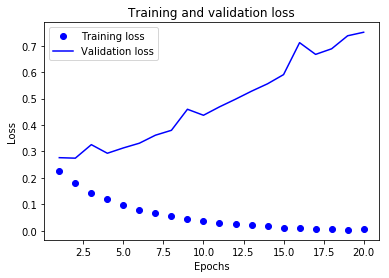

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

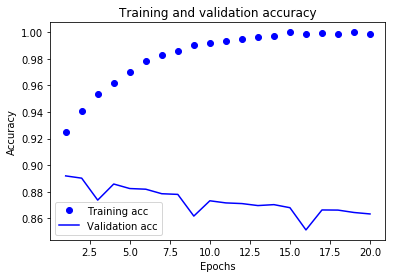

In [11]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()